# Online Retail Problem

Dataset: https://archive.ics.uci.edu/ml/datasets/Online+Retail

### Problem 1: Find on which day of the week the store is more busy.  And plot a bar chart with 7 days.

In [64]:
from openpyxl import load_workbook

In [65]:
wb = load_workbook(filename="Online Retail.xlsx", read_only=True)
print("Sheets:",wb.sheetnames)

Sheets: ['Online Retail']


In [66]:
retail_sheet = wb["Online Retail"]
print("Sheet Max rows : %s" % retail_sheet.max_row)

days = []
for row in retail_sheet.iter_rows(min_row=2, values_only=True):
    if len(row) > 0:
        cell = row[4]
        day = cell.strftime("%a")
        days.append(day.upper())

print("Total Records : %s" % len(days))
print(days[0])

Sheet Max rows : 541910
Total Records : 541909
WED


In [67]:
def simple_counter(lst:list):
    counts = {}
    for i in lst:
        counts[i] = counts.get(i, 0) + 1
    return counts

In [68]:
days_counter = simple_counter(days)
print(days_counter)

{'WED': 94565, 'THU': 103857, 'FRI': 82193, 'SUN': 64375, 'MON': 95111, 'TUE': 101808}


In [69]:
days_list = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
days_counts = []

for i in days_list:
    days_counts.append(days_counter.get(i,0))

print(days_list)
print(days_counts)

['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
[95111, 101808, 94565, 103857, 82193, 0, 64375]


In [70]:
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(False)
%matplotlib notebook

In [71]:
def auto_label(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [72]:
def plot_bar_chart(x, y):
    plt.close()
    plt.rcParams.update({'figure.autolayout': True})
    fig, ax = plt.subplots(figsize=(10,5))
    # x = days_list
    # y = days_counts
    width = 0.50
    
    rects1 = ax.bar(x, y, width, label='Orders')
    
    ax.set_title('Online Retail - Daily Order Activity [Bar Chart]')
    ax.set_xlabel("Day of the Week")
    ax.set_ylabel("Order Count")

    auto_label(ax, rects1)

    plt.show()

<IPython.core.display.Javascript object>


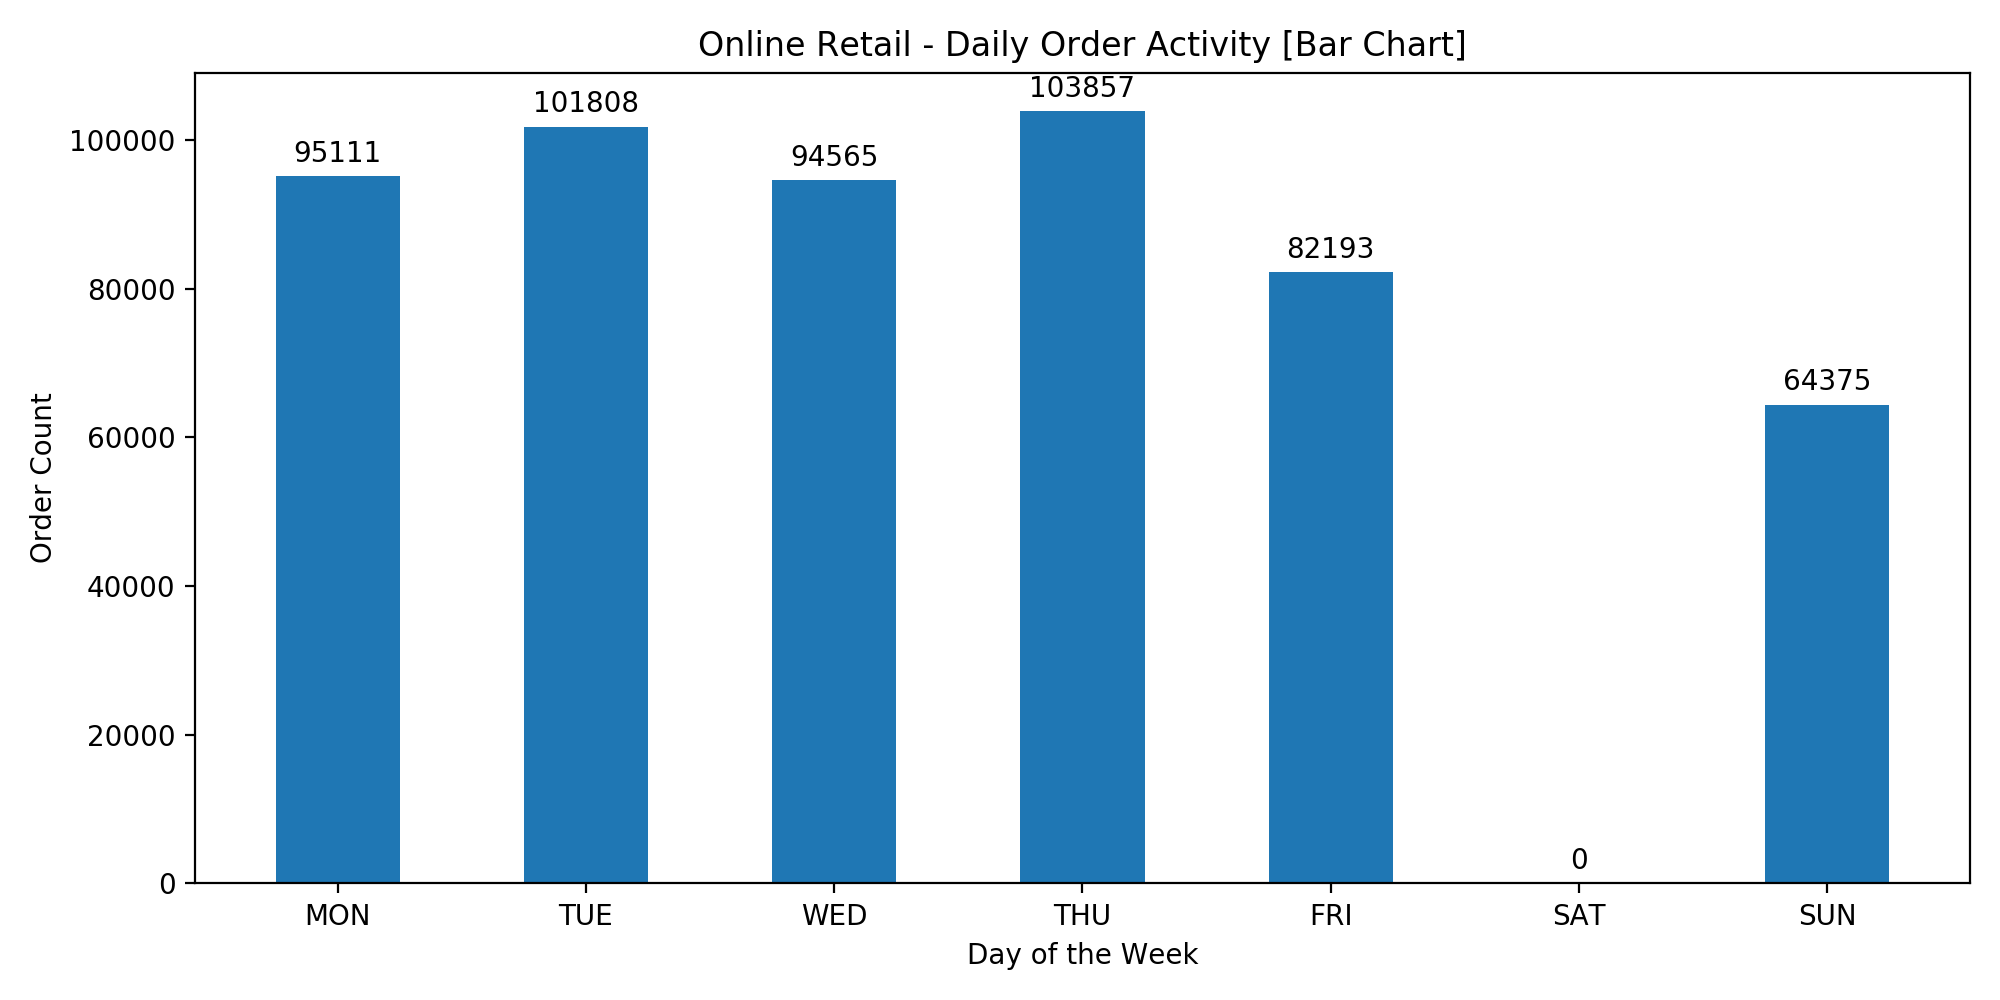

In [76]:
plot_bar_chart(days_list, days_counts)

### Problem 2: Normalize data set and plot a bar chart

#### Normalize : Scale the max day of week as 100%.   And then find the relative comparision with others. 

In [74]:
max_value = max(days_counts)
print(max_value)

days_norm = []
for i in days_counts:
    value = i/max_value * 100
    value = float('%.2f'%(value))
    days_norm.append(value)

print(days_norm)

103857
[91.58, 98.03, 91.05, 100.0, 79.14, 0.0, 61.98]


<IPython.core.display.Javascript object>


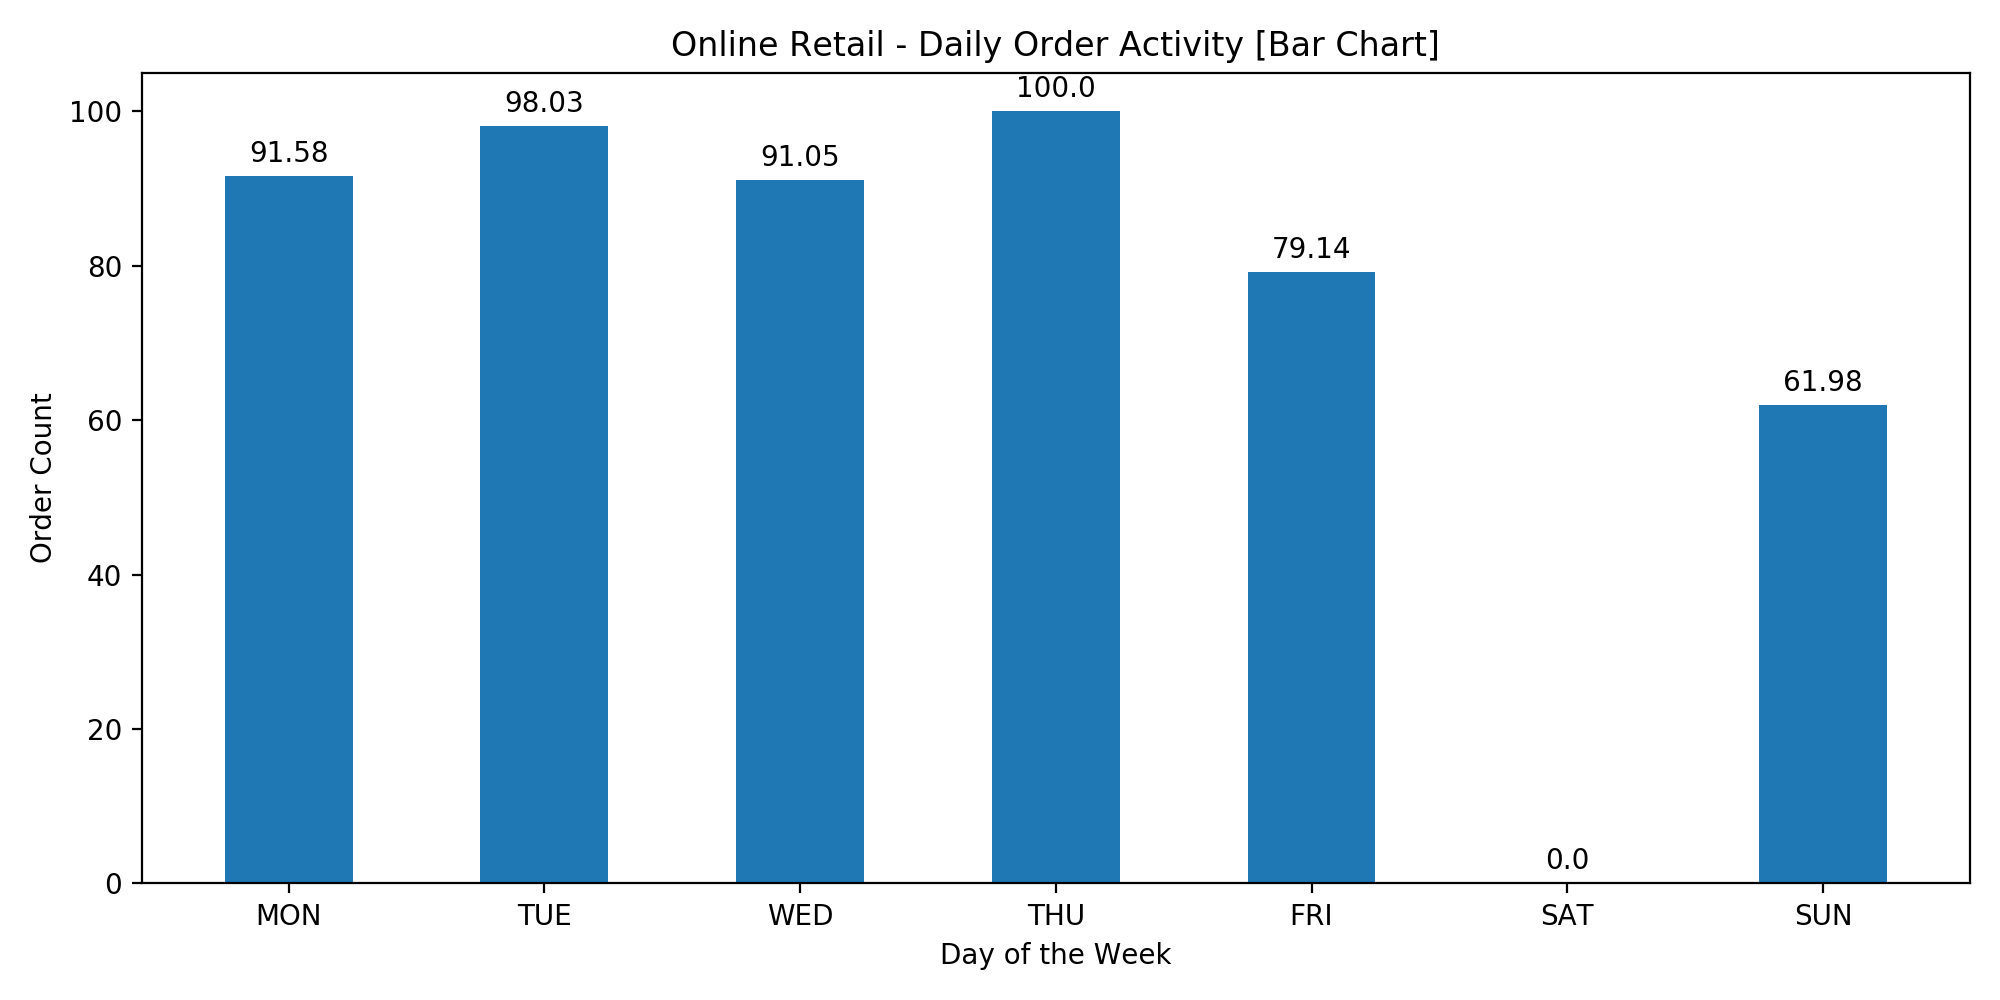

In [77]:
plot_bar_chart(days_list, days_norm)

### Problem 3: Find peak seasonal trends in the year and normalize the trend to get the same result as above for a typical week.